# $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ <i>HW 1</i> 

 
<i><b>CS484 - CS555 Introduction to Computer Vision

>Dr. Sedat OZER 

>Submission Deadline:</b>  23:59, November 1st, 2020  - After  that  time, late submissions will receieve 25% penalty per additional day!

><b>TA e-mails:</b> 
>> Aziza: az.saber1995@gmail.com

>> Furkan: furkan.huseyin@bilkent.edu.tr 

><b>Submission link:</b> (Submit your HW through this link:) https://forms.gle/njHwSn7WLSk5S7CW9 <i/>

__________________________________________________________________________________________

# Running your code on Google Colab
*  It is strongly advised that you first go through the links below and familiarize yourself with the Colab environment. 

* You should first load this HW file (HW1.ipynb) on Google Colab ( https://colab.research.google.com ) and run it on Google Colab which acts as a remote server since we will also test your code on Colab. Then go through the links below to get a better understanding of Colab environment.
* Note that you can run this file on your local jupyter notebook as well, however, we will test your submissions on Google Colab and your code and submitted notebook is expected to run on Google Colab. It is student's responsibility to make sure that his/her submitted file will run on Colab without any error.

Useful links (You should go through the links below to get introductory material for Colab and image processing with Python):

* https://web.eecs.umich.edu/~justincj/teaching/eecs498/FA2020/colab.html

* https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb

* https://colab.research.google.com/drive/1b8pVMMoR37a3b9ICo8TMqMLVD-WvbzTk

* There are many Colab tutorials available on Youtube. Here is a short video: https://www.youtube.com/watch?v=inN8seMm7UI and another video: https://www.youtube.com/watch?v=i-HnvsehuSw



#### __Instructions and Notes on Answering Your Homework__

* Save a copy of your own HW1.ipynb file locally and save that file in the following format: ***FullName_StudentID_HW1.ipynb***, where FullName is your name and surname respectively, and StudentID is your student ID number. Then you can upload that file on Colab.
* Use the submission link (see above for the link) to submit your solutions.
Email your solution to the TA ( az.saber1995@gmail.com ) with the email subject: ***FullName_CS484CS555_HW1***; in which ***FullName*** is your name and surname. Your file(s) need to be compressed as a single ***zip*** file containing both your .ipynb file (including your saved results).
* You will be graded for your <b>implementation</b>, <b>results</b> and also for a <b>brief explanation</b> of your answer, if asked.
* An implementation that is not generating the correct result, may not receive any credit. To get full credit for a question, you need to follow all the instructions given for that question and provide all the required discussions and results correctly.
* We will run your code on Colab. Make sure that your code runs without any  error on Colab.
* All submissions must have your own code/implementation. To get ideas, you can discuss with your friends. But, your submission needs to be your own work.
* Cheating will be punished as described on the course website.
* In questions 2, 3, 4, 5 and 6 you need to use grayscale versions of the given images as input (a given RGB image must be converted into a grayscale image first).
* SUBMIT  YOUR SOLUTIONS (your new .ipynb file) as a zip file (as described above) at: https://forms.gle/njHwSn7WLSk5S7CW9
*  Late submissions will receive %25 per day passing the submission deadline.










#### __Question 1 - Warm up - Read, save and show images__ (5 points)

OpenCV is a big and well-known library containing a large set of Computer Vision and Image Processing related functions. In this part of the assignment, you will learn to apply some basic functions of opencv on images. 
* First read the `Q1.png` and then, reduce its size by dividing its height and width by 3 and display that new resized image (with figure name 'resized image'). You need to save your resized image as `img01_1.jpg`.  

* Next, convert your original input image (`Q1.png`) into grayscale and do the same operations (with figure name 'gray and resized image') on the grayscale image and display it.

For loading an image on Colab - you can check the following two sites to get ideas:
* https://datascience.stackexchange.com/questions/29480/uploading-images-folder-from-my-system-into-google-colab
*  https://towardsdatascience.com/the-2-step-guide-to-upload-images-in-google-colab-b51348e882e4




Mounted at /content/drive
(229, 308, 3)


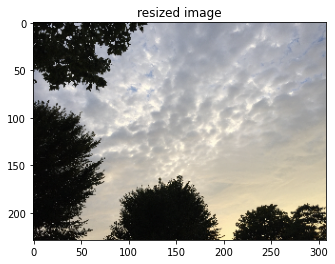

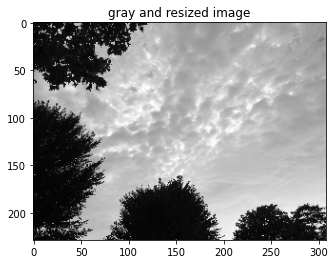

In [63]:

#implement and run your python code for Question 1 in this box (here).

# You can use the sample code snippet below as a STARTING POINT! 
# (Feel free to edit or delete the code snippet below!)
import cv2 as cv 
import matplotlib.pylab as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive', force_remount=True)
# Note: Check the path of the HW1 files first, AFTER uploading them on your own google drive 
# and replace the path below with the actual one on your own google drive, if it differs.  
image = cv.imread('/content/drive/My Drive/CS484-CS555/HW1-Fall2020/images/Q1.png') 
height, width, channels = image.shape
resized_image = cv.resize(image, (int(width / 3), int(height / 3)))
#cv2_imshow(resized_image) color mapping BGR 
resized_image = cv.cvtColor(resized_image, cv.COLOR_BGR2RGB) # convert to RGB to print in matplotlib
plt.figure()
plt.title('resized image')
print(resized_image.shape)
plt.imshow(resized_image)

cv.imwrite('./images/' + 'img01_1.jpg', resized_image)
gray_scale = cv.cvtColor(resized_image, cv.COLOR_RGB2GRAY)
plt.figure()
plt.title('gray and resized image')
plt.imshow(gray_scale, cmap='gray')




#### __Question 2 - Image histogram__ (10 points)

In this part, you will compute and display the histogram of a grayscale image. A histogram is a graph that shows the total number of pixels for each intensity value of an image. It gives you an idea about the intensity distribution of a given image. 

* Compute and plot the histogram of the following images: `Q1.png`, `Q2.png`, `Q2_2.png`

Then compare and **discuss** your results in the text box that was given below the code box.
* You must implement the histogram computing part yourself; you can not use any libraries' built-in function to compute the histogram.

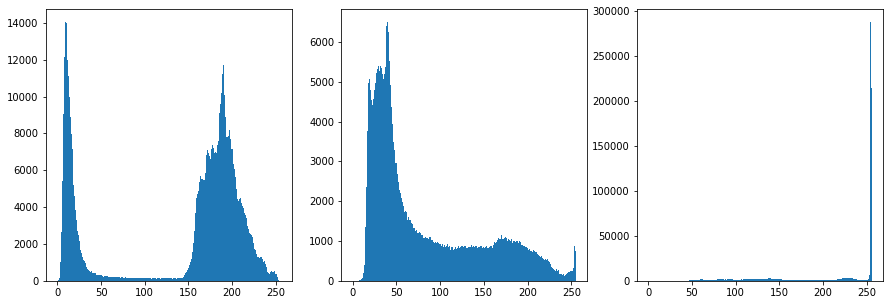

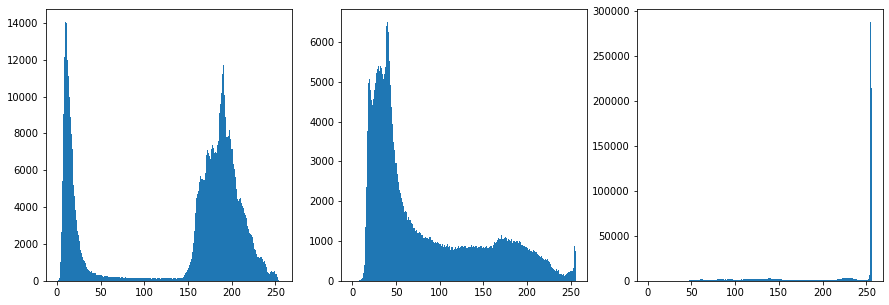

In [4]:
import numpy as np

##put and run your code for Question 2 here
def histogram_calculator(image, text=None):
  height, width = image.shape
  #print("height is: " + str(height) + " width is: " + str(width))
  histogram = np.zeros((256), dtype=int)
  for i in range(height):
    for j in range(width):
      index =  int(image[i , j])
      if text == "valid":
        print("Index is: " + str(index))
      histogram[index] = histogram[index] + 1

  return histogram

# first read the images: Q1.png, Q2.png and Q2_2.png
im02 = cv.imread('/content/drive/My Drive/CS484-CS555/HW1-Fall2020/images/Q1.png') 
im03 = cv.imread('/content/drive/My Drive/CS484-CS555/HW1-Fall2020/images/Q2.png') 
im04 = cv.imread('/content/drive/My Drive/CS484-CS555/HW1-Fall2020/images/Q2_2.png') 
im02_gray = cv.cvtColor(im02, cv.COLOR_BGR2GRAY) 
im03_gray = cv.cvtColor(im03, cv.COLOR_BGR2GRAY) 
im04_gray = cv.cvtColor(im04, cv.COLOR_BGR2GRAY) 
#calculate and plot the histogram of each image (with titles Q1, Q2, Q2_2 respectively), and display their histograms.

h, w = im02_gray.shape
h2, w2 = im03_gray.shape
h3, w3 = im04_gray.shape
'''
'''
histogram_im02 = histogram_calculator(im02_gray)
histogram_im03 = histogram_calculator(im03_gray)
histogram_im04 = histogram_calculator(im04_gray)
plt.figure(figsize=([15, 5]))


plt.subplot(131), plt.bar(list(range(0, 256)), histogram_im02, width=1.0)
plt.subplot(132), plt.bar(list(range(0, 256)), histogram_im03, width=1.0)
plt.subplot(133), plt.bar(list(range(0, 256)), histogram_im04, width=1.0)


# You can use the sample code below to COMPARE your own implementation of histogram
#____________________

plt.figure(figsize=([15, 5]))

plt.subplot(131), plt.hist(im02_gray.ravel(),bins = 256, range = [0,256]) 
plt.subplot(132), plt.hist(im03_gray.ravel(),bins = 256, range = [0,256]) 
plt.subplot(133), plt.hist(im04_gray.ravel(),bins = 256, range = [0,256]) 
plt.show()




#### Show and compare all three histograms. Discuss the difference(s) between dark and bright images in terms of histogram.



> **Explanation:**

> I have created 3 histograms for these 3 images. They shows the pixel distribution over 0 to 255 because of grayscale image. 0 reperesents black pixels and 255 represents white. From this description we can say that values range from 0 to 255 becomes whiter and brighter.

> For the first histogram we see that it has a lot of dark and white pixels due to peaks in approximately 30s and 200s in the pixel distribution. For the second histogram we see that it has a lot of dark pixels and general pixels distributed over range of 50s and 240. Thus its darkness and brightness more uniform than first histogram. For the third one, we see that values reach peak at 250s. This means that it consist of a lot of white pixels. As we can see from the original image. It has a lot of white object and this can be obtained from the pixel distribution of its histogram.
Overall distribution. Second histogram has most black colored image. First one has both black and white places almost equally. And the third one consist from lots of white pixels. We can make these observation from three histograms.

#### __Question 3 - Histogram equalization Part A__ (15 points)

* In this part, you will implement histogram equalization (for a grayscale image) to enhance the contrast in an image. Histogram equalization distributes the existing intensities on an image to a larger range so that all intensity values are used, as much as possible. Use images: `Q2.png` and `Q2_2.png` for this question.

* Based on the results you obtain, discuss whether it is a good idea to use histogram equalization on all images in general.

* You can not use openCV's (or any other libraries') built-in function to equalize histograms; you need to implement the histogram equalization part by yourself here. Also, you are not allowed to compute the histogram using built-in histogram functions either. You need to use your own implemantation of histogram computing from the previous question.

Helpful sites:
* https://en.wikipedia.org/wiki/Histogram_equalization
* https://www.math.uci.edu/icamp/courses/math77c/demos/hist_eq.pdf
* http://www.sci.utah.edu/~acoste/uou/Image/project1/Arthur_COSTE_Project_1_report.html#equalization




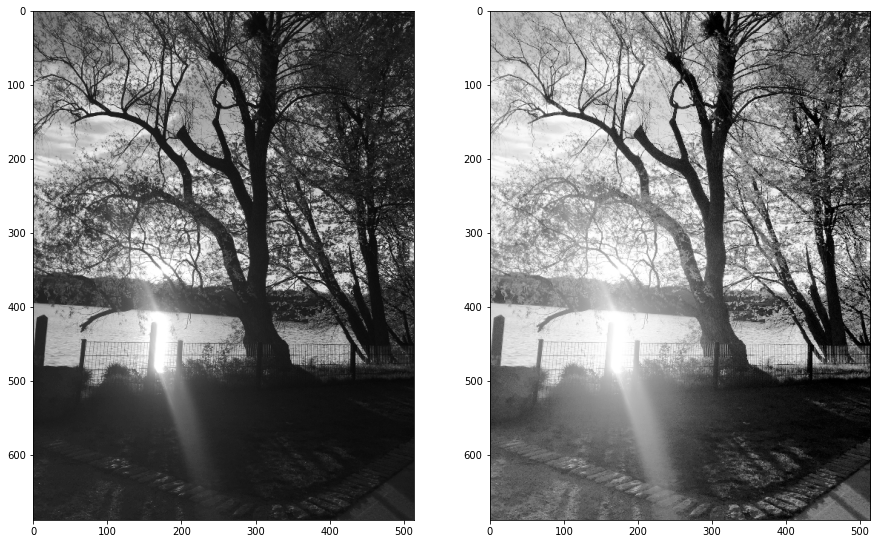

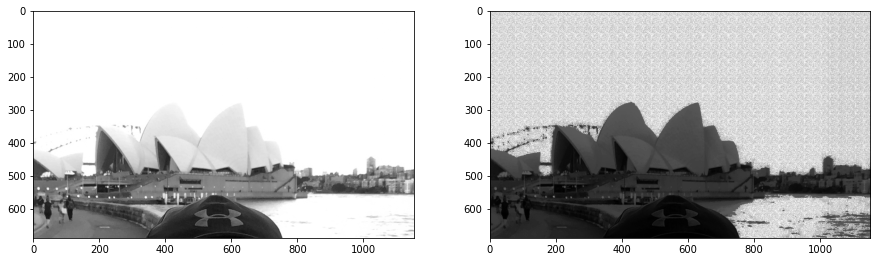

In [5]:
# returns cumulative sum of the given histogram
def cumulative(histogram_array):
    cumulative_array = np.zeros((256), dtype=int)
    sum = 0
    for i in range(0, 256):
        sum = sum + histogram_array[i]
        cumulative_array[i] = sum
    return cumulative_array

def normalizer(cumulative_imq2):
  normalize = (cumulative_imq2 - cumulative_imq2.min()) * 255
  N = cumulative_imq2.max() - cumulative_imq2.min()
  return normalize / N
# display the original grayscale image and the result with titles "original grayscale image", "equalized image" respectively
# display them in subplots, in which the first subplot is original image,
# second subplot is the result after applyiny histogram equalization.
#_____________________________
im2 = cv.imread('/content/drive/My Drive/CS484-CS555/HW1-Fall2020/images/Q2.png')
im2_gray = cv.cvtColor(im2, cv.COLOR_BGR2GRAY)
im3 = cv.imread('/content/drive/My Drive/CS484-CS555/HW1-Fall2020/images/Q2_2.png') 
im3_gray = cv.cvtColor(im3, cv.COLOR_BGR2GRAY)
height2, width2 = im2_gray.shape
height3, width3 = im3_gray.shape

#Process Q2.png
flattened_image = np.reshape(im2_gray, ((height2 * width2)))
# execute our histogram function
histogram_q2 = histogram_calculator(im2_gray)
#get cumulative of the histogram
cumulative_imq2 = cumulative(histogram_q2)

#normalize
cumulative_imq2 = normalizer(cumulative_imq2)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1,2,1)
plt.imshow(im2_gray, cmap='gray')

img_new = cumulative_imq2[flattened_image]
img_new_q2 = np.reshape(img_new, (height2, width2))
fig.add_subplot(1,2,2)
plt.imshow(img_new_q2, cmap='gray')


#########################################
flattened_image = np.reshape(im3_gray, ((height3 * width3)))
# execute our histogram function
histogram_q2_2 = histogram_calculator(im3_gray)
#get cumulative of the histogram
cumulative_imq2_2 = cumulative(histogram_q2_2)
#normalize
cumulative_imq2_2 = normalizer(cumulative_imq2_2)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1,2,1)
plt.imshow(im3_gray, cmap='gray')

img_new = cumulative_imq2_2[flattened_image]
img_new_q2_2 = np.reshape(img_new, (height3, width3))
fig.add_subplot(1,2,2)
plt.imshow(img_new_q2_2, cmap='gray')

# Show both images and their histogram equalized versions below


Discuss here if histogram equalization seems like a good solution for any and all types of images (based on the results you see from the given two images).

> Explanation:

> As we see from the results histogram equalization increases the global contrast of the image. Due to it uses cumulative histogram data and normalize it. It becomes more usefull when image has close contrast values. In deed, it arranges local low contrast areas to the higher contrast and increases the global contrast.

> As mentioned, contrast values of the image need to be close to each other. It is important that background and foreground values need to both be bright or dark. Otherwise, contrast will be very different in image and using image equalization will create problem due to difference in local contrast values of the image. From my reading, I learn that image equalzation is usefull for X-ray images. Again point here is that image values of X-ray dark in general. Thus, it has close contrast in global and image equalization is usefull. However, if the image has different local contrast in different areas of the image then image equalization will give undesired results because it will spoil the contrast in these areas.



#### __Question 3 - Histogram equalization Part B__ (5 points)

1. In this part, you will compute the histogram equalization again on the same images that you used in the previous part (`Q2.png`, `Q2_2.png`). The only difference is that, this time, you are allowed to use OpenCV's built-in histogram equalization function. 

2. After you apply the histogram equalization on both images, compare your results with the results obtained in the previous question (Question 3a). 

* Use subplots for showing the four results together. The first subplot is the result image from part "a" for image `Q2.png` with title 'Q2 equalized'. The second subplot is the result from part "a" for image `Q2_2.png` with title 'Q2_2 equalized'. The third subplot is the result image from part "b" for image `Q2.png` with title 'Q2 equalized OpenCV'. The fourth subplot is the result image from part "b" for image `Q2_2.png` with title 'Q2_2 equalized OpenCV'.

* Also, plot the histogram of `Q2_2.png` before applying histogram equalization and the histogram of resulting image after applying histogram equalization on the same image. Show both histograms side by side in a single Figure.  

Helpful sites: 
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd9c111a908>,
 <BarContainer object of 256 artists>)

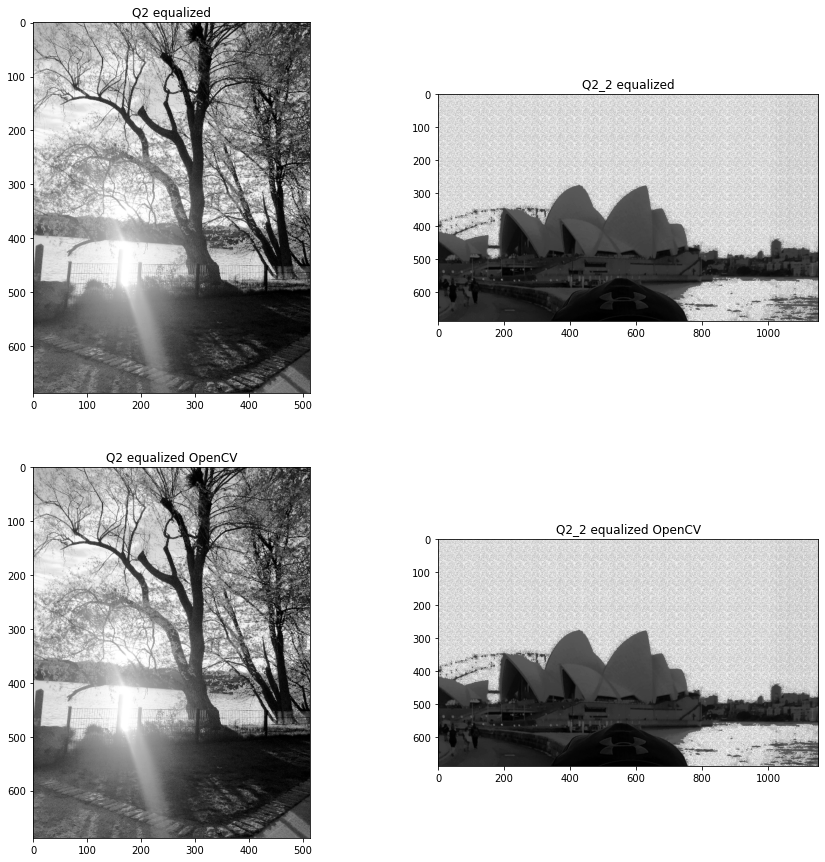

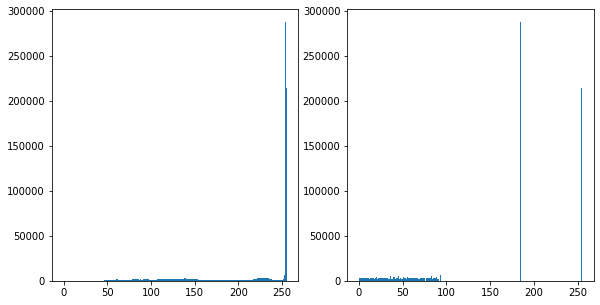

In [6]:
# put and run your code for Question 3b here
equ = cv.equalizeHist(im2_gray)
equ2 = cv.equalizeHist(im3_gray)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax1 = fig.add_subplot(2,2,1)
ax1.title.set_text('Q2 equalized')
plt.imshow(img_new_q2, cmap='gray')
ax2 = fig.add_subplot(2,2,2)
ax2.title.set_text('Q2_2 equalized')
plt.imshow(img_new_q2_2, cmap='gray')

ax3 = fig.add_subplot(2,2,3)
ax3.title.set_text('Q2 equalized OpenCV')
plt.imshow(equ, cmap='gray')
ax4 = fig.add_subplot(2,2,4)
ax4.title.set_text('Q2_2 equalized OpenCV')
plt.imshow(equ2, cmap='gray')

histogram_q2_2_before = histogram_calculator(im3_gray)
histogram_q2_2_after = histogram_calculator(img_new_q2_2)

plt.figure(figsize=([15, 5]))
plt.title('histogram_q2_2_before and histogram_q2_2_after')
plt.subplot(131), plt.bar(list(range(0, 256)), histogram_q2_2_before, width=1.0)
plt.subplot(132), plt.bar(list(range(0, 256)), histogram_q2_2_after, width=1.0)

#### __Question 4 - Otsu's thresholding__ (15 points)

* Implement automated thresholding by Otsu’s Method. You must use your own implementation and avoid using any image processing libraries (except for reading and plotting images). Your function declaration should take a grayscale image (a 2D matrix) as an input and produce a binary image (also a 2D matrix) of the same dimensions as in the input image. Use the format below:

` binary_image = otsu_threshold(source_image)`

* Separate the background from the foreground using your implementation of Otsu’s algorithm. Show the binary mask and the original input image side by side. Test your results on both `Q2.png` and `Q2_2.png` files. Discuss your results, are they always perfect? Why so, why not?

* Use image: `Q1.png` and after applying Otsu's thresholding on the image,  **show only the clouds** by removing the content of tree from the image (i.e., do not show the actual pixels that belog to a tree). (All the pixels that belong to a tree can be artificially colored with a fix color value).

Useful links:

* https://en.wikipedia.org/wiki/Otsu%27s_method
* http://www.labbookpages.co.uk/software/imgProc/otsuThreshold.html
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html






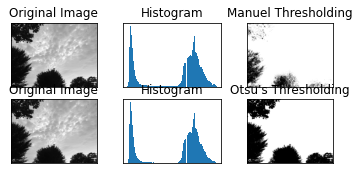

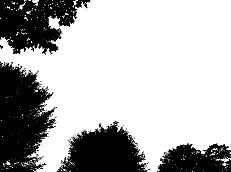

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


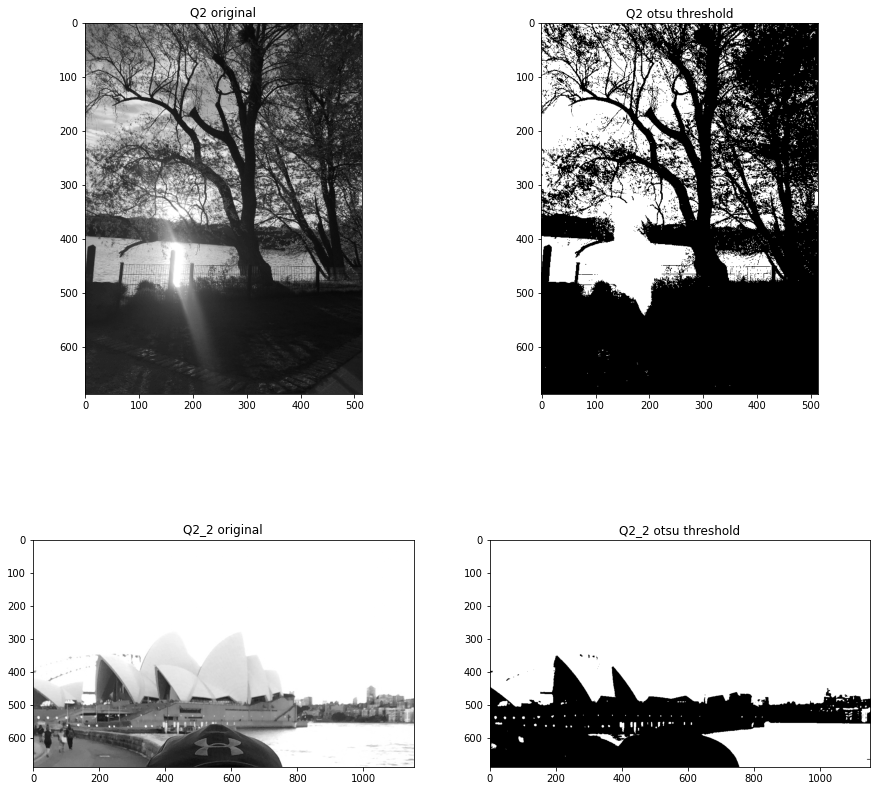

In [7]:
# implement your function below.
def otsu_threshold(img):
  histogram = histogram_calculator(img)
  max = 0
  th = 0
  histogram_sum = histogram.sum()
  probs = histogram / histogram_sum 
  
  for i in range(1, 256):
    w0 = probs[0:i].sum(); #foreground weight according to the current threshold
    w1 = probs[i + 1: 256].sum() #background weight according to the current threshold
    u0 = range(0, i-1) @ probs[1:i] / w0 #mean(foreground)
    u1 = range(i, 255) @ probs[i+1:256] / w1 #mean(background)
    sigma= w0 * w1 * ((u1-u0)**2)  #variance
    
    if sigma > max:
       max = sigma
       th = i-1;  #threshold index
  #print(th)
  binary_image = np.zeros(img.shape)
  binary_image [img>=th] = 255
  binary_image [img<th] = 0
  return binary_image
  
# See the OpenCV sample below that computes and compares three different thresholding technique on the same input image. 
# This code example uses OpenCV's built-in functions. HOWEVER, you need to implement OTSU's technique by yourself.
# the first thresholding below is the standard thresholding technique where we enter the threshold values manually,
# the second thresholding below is the OTSU's technique. 
# Change the image path according to your own Google drive structure!
img = cv.imread('/content/drive/My Drive/CS484-CS555/HW1-Fall2020/images/Q1.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
# global thresholding
ret1,th1 = cv.threshold(img,10,255,cv.THRESH_BINARY)
#print("ret1 is: " + str(ret1) + " th1 is: " + str(th1))

# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)


# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2]
titles = ['Original Image','Histogram','Manuel Thresholding',
          'Original Image','Histogram',"Otsu's Thresholding"]

plt.imshow(th1,'gray')

for i in [0,1]:
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

#Now lets show the result obtained with Otsu's technique in a larger frame. 
height, width = th2.shape[:2]
th2 = cv.resize(th2, (int(width/4), int(height/4))) 
cv2_imshow(th2) 

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax1 = fig.add_subplot(2,2,1)
ax1.title.set_text('Q2 original')
plt.imshow(im2_gray, cmap='gray')
ax2 = fig.add_subplot(2,2,2)
binary_image = otsu_threshold(im2_gray)
binary_image = binary_image.astype('uint8')
ax2.title.set_text('Q2 otsu threshold')
plt.imshow(binary_image, cmap='gray')

ax3 = fig.add_subplot(2,2,3)
ax3.title.set_text('Q2_2 original')
plt.imshow(im3_gray, cmap='gray')
ax4 = fig.add_subplot(2,2,4)
binary_image = otsu_threshold(im3_gray)
binary_image = binary_image.astype('uint8')
ax4.title.set_text('Q2_2 otsu threshold')
plt.imshow(binary_image, cmap='gray')

#### Discuss your results and it results always good in otsu?


> Explanation:

Otsu returns background and foreground of the image. To do this it find pixel value which separates background and foreground. As we can see from the images it gives close object in black. But pixel values are very imporant for example, in Q2_2 image. We see that hat is very close and it returned as black. However, Opera house's some part returned black due to their color values very close to the foreground color values.
In the image Q2 again opposite shore is returned as black. This occurs again due to color values. But they are very far from the trees. Thus they need to be separated from the trees.

As we describe value distribution of the histogram very important. If it has peaks in pixels close to 0s and 250s then it shows good performance. However,
if the objects are small in the image compared with the background area. the histogram no longer exhibits peaks in background and foreground. 
And if the variances between the objects and the background. Then the possibly incorrect threshold determined by Otsu's method or the foreground and background will not be separated appropriately.





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


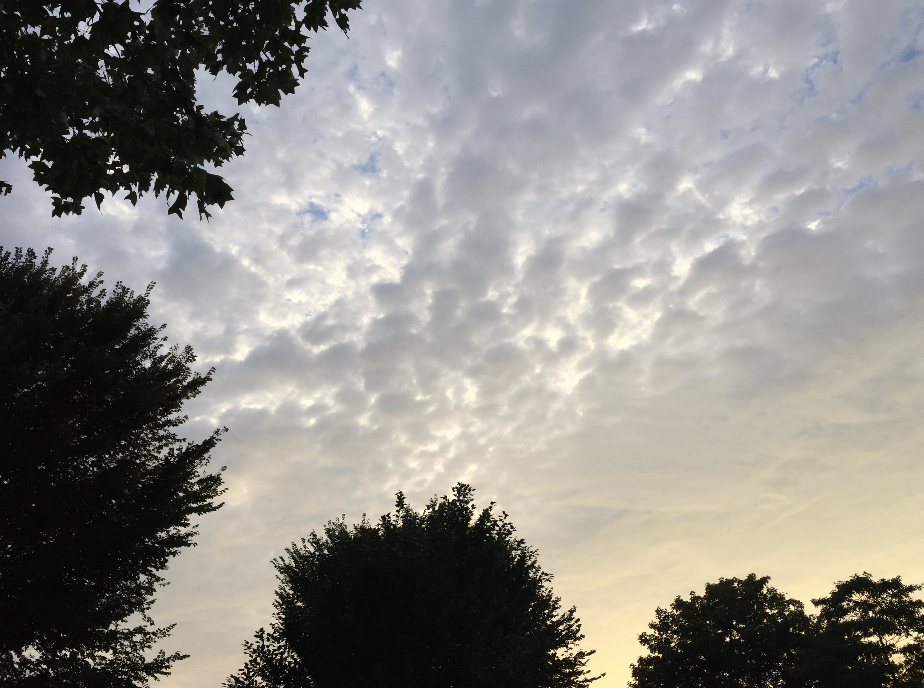

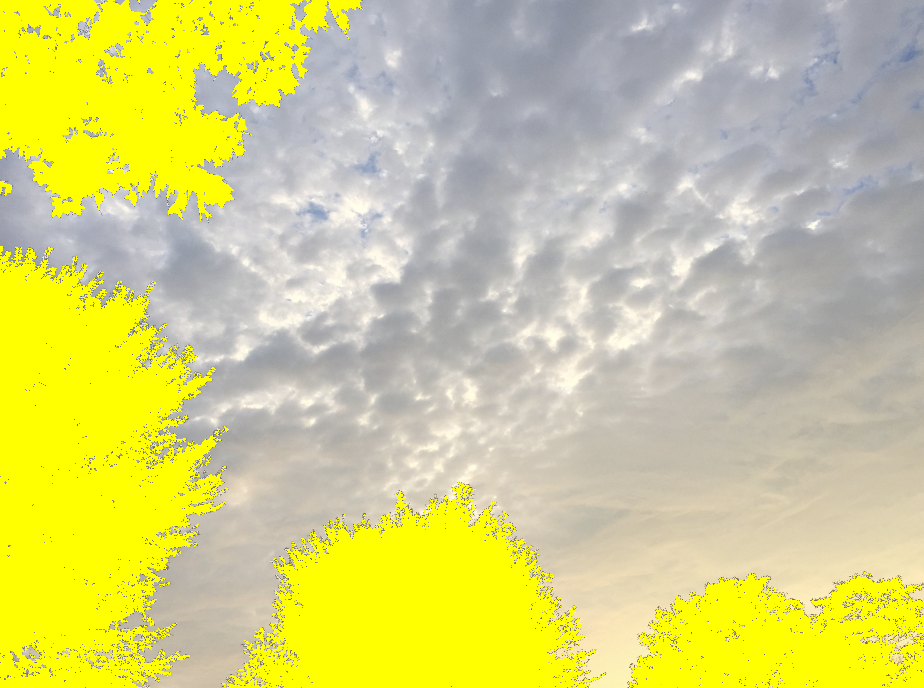

In [8]:
# Here you can test your function on the given binary image and see the result
img = cv.imread('/content/drive/My Drive/CS484-CS555/HW1-Fall2020/images/Q1.png')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
binary_image = otsu_threshold(img_gray)

ret2,th2 = cv.threshold(img_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#cv2_imshow(binary_image)

#remove clouds
img = cv.imread('/content/drive/My Drive/CS484-CS555/HW1-Fall2020/images/Q1.png')
cv2_imshow(img)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
binary_image = otsu_threshold(img_gray)
img[(binary_image == 0)] = (0,255,255)
cv2_imshow(img)

#### __Question 5 - Morphological Operators - Part A: Implement Dilation__ (15 points)

In  this section, you will first implement Dilation operator as a function. In your function, you will take two inputs (as matrices): (i) the input image as a matrix and (ii) a structuring element (also as a matrix), and produce a binary image (another matrix) as output. Note that the resulting image matrix should be of the same size as input image matrix. As before, in your function, your methods should be generic, that is it should work with grayscale image and structuring element of any size. Your method declaration should look as follows:

`dilated_image = dilation (source_image , structuring_el )`

* You should generate the structuring element (kernel) as a binary image with an arbitrary shape (you can use 3 by 3 square matrix with all 1s **for testing**). 

* Given the structuring element, your code should implement the dilation operation by using the definitions given in the course slides. Note that the structuring element should be created (as a matrix) outside and given as an input to the dilation/erosion codes so that your code can work with any kind of structuring element. You can assume that the origin is in the center, or get the coordinate of the origin as a separate input to your functions.

In [9]:
import math 
import numpy as np
## implement your python function for dilation  here
# 
#
def dilation (source_image , structuring_el ):
  rows = len(structuring_el)
  columns = len(structuring_el[0])
  neighbourhood_index_height = math.floor(rows / 2)
  neighbourhood_index_height2 = math.ceil(rows / 2)
  neighbourhood_index_width = math.floor(columns / 2)
  neighbourhood_index_width2 = math.ceil(columns / 2)
  structuring_el = structuring_el.astype(int)
  source_image = np.pad(source_image, max(neighbourhood_index_height, neighbourhood_index_width))
  height, width = source_image.shape
  height_start_index = neighbourhood_index_height
  height_end_index = height - neighbourhood_index_height2
  width_start_index = neighbourhood_index_width
  width_end_index = width - neighbourhood_index_width2

  dilated_matrix = np.zeros((height, width), dtype=int)
  target_x = math.floor(rows / 2)
  target_y = math.floor(columns / 2)

  for x in range(height_start_index, height_end_index):
    for y in range(width_start_index, width_end_index):
      matrix_n = source_image[x-neighbourhood_index_height : x+neighbourhood_index_height2, y-neighbourhood_index_width:y+neighbourhood_index_width2]
      matrix_n = matrix_n.astype(int)
      matrix_n = matrix_n / 255
      matrix_n = np.sum(matrix_n, axis = 0)
      matrix_n = np.sum(matrix_n, axis = 0)
      if matrix_n > 1:
        dilated_matrix[x, y] = 255


  padding = max(neighbourhood_index_height, neighbourhood_index_width)
  return dilated_matrix[padding: -padding, padding: -padding]
  #return dilated_matrix



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


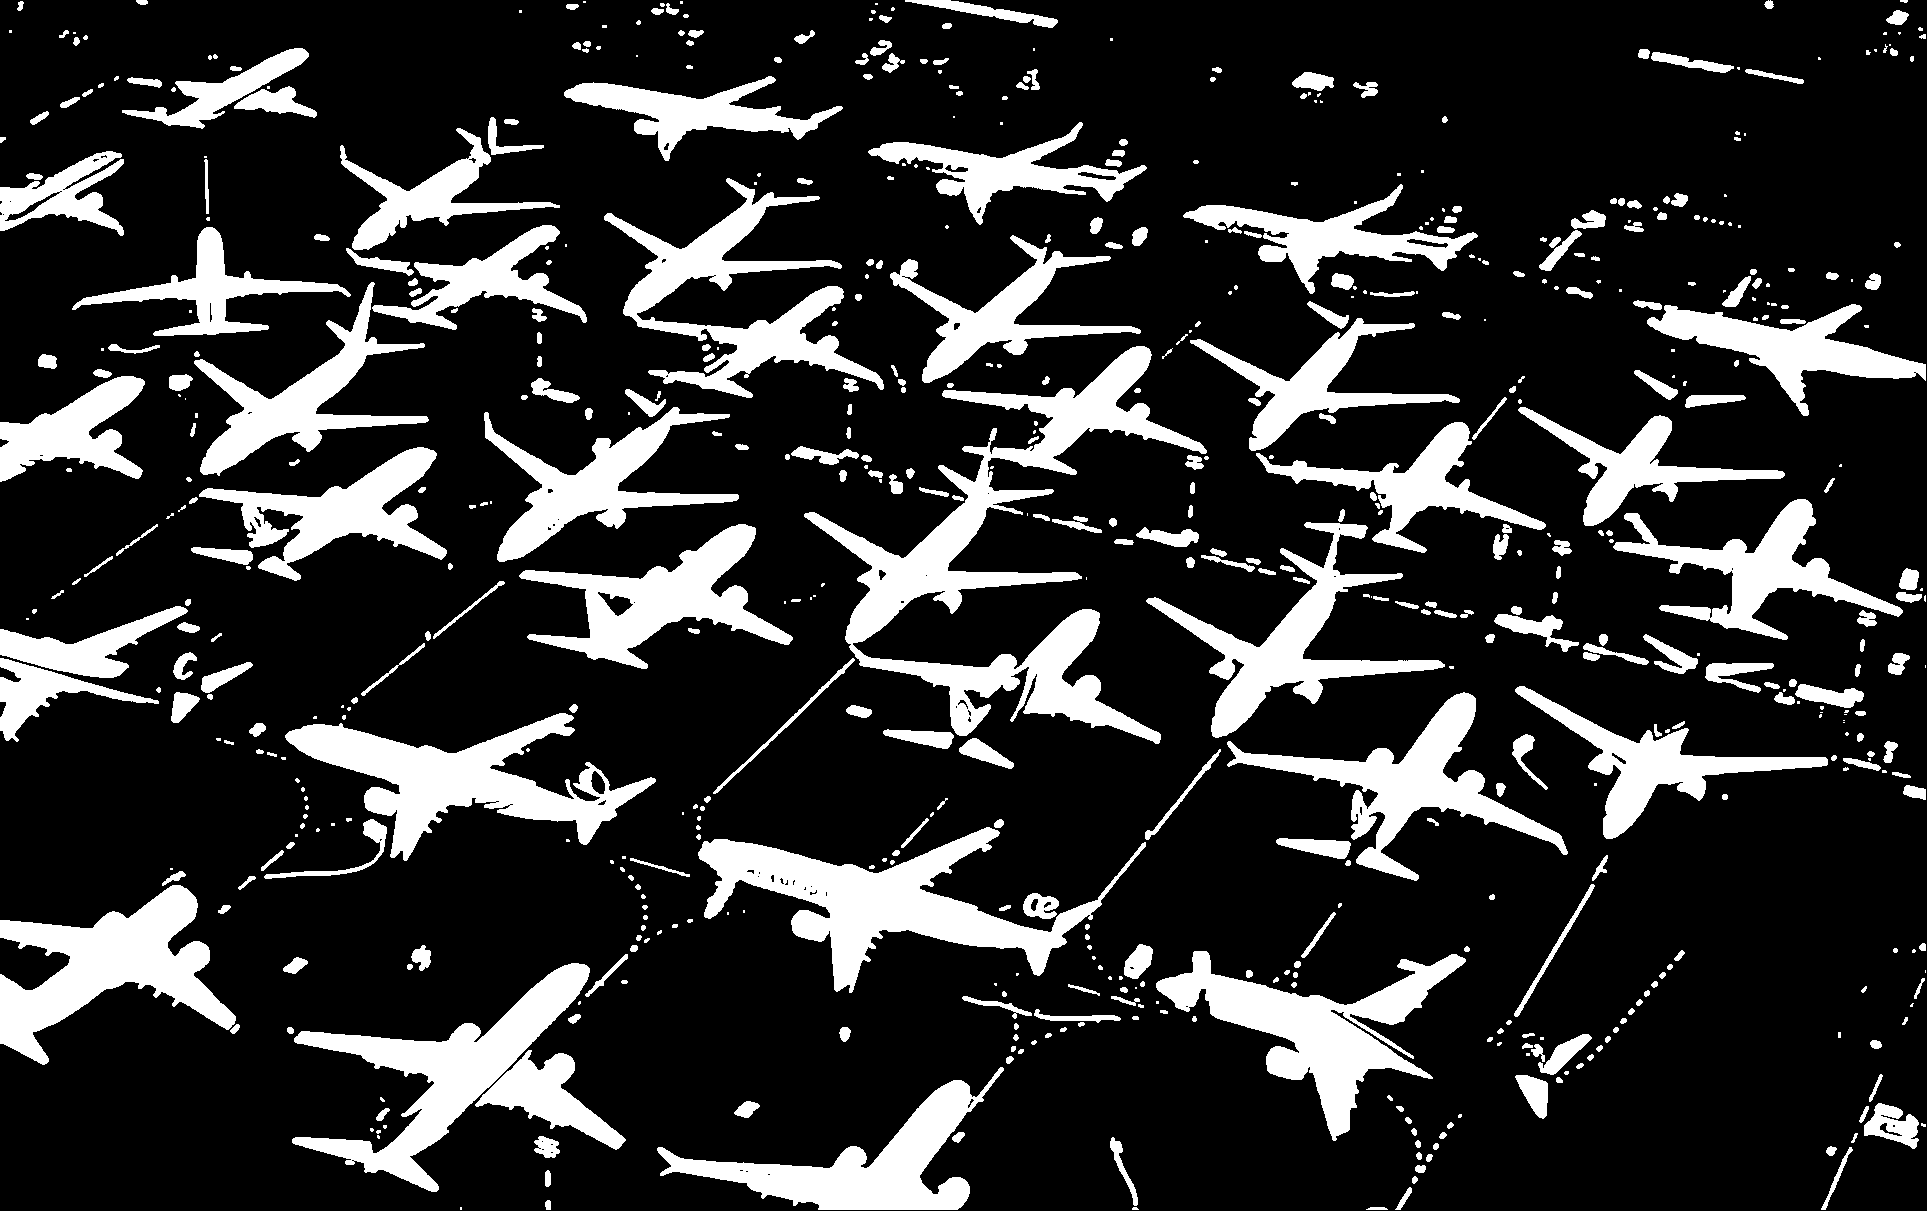

In [17]:
# test your dilation function here on 3b.png with a 3x3 structuring element (matrix) with all 1s.
img = cv.imread('/content/drive/My Drive/CS484-CS555/HW1-Fall2020/images/3b.png')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
structuring_el = np.ones((3, 3))
img_gray = otsu_threshold(img_gray)
dilated_image = dilation (img_gray , structuring_el)
cv2_imshow(dilated_image)


#### __Question 5 - Morphological Operators - Part B: Implement Erosion__ (15 points)

Similar to the previous question, you will also implement a morphological operator here. This time, you will implement Erosion operator as a function. In your function, you will take two inputs (as matrices): (i) the input image as a matrix and (ii) a structuring element (also as a matrix), and produce a binary image (another matrix) as output. Note that the resulting image matrix should be of the same size as input image matrix. As before, in your function, your methods should be generic, that is it should work with grayscale image and structuring element of any size. Your method declaration should look as follows:

`eroded_image = erosion ( source_image , structuring_el )`

* You should generate the structuring element (kernel) as a binary image with an arbitrary shape (you can use 3 by 3 square matrix with all entries being 1 **for testing**). 

* Given the structuring element, your code should implement the erosion operation by using the definitions given in the course slides. Note that the structuring element should be created (as a matrix) outside and given as an input to the dilation/erosion codes so that your code can work with any kind of structuring element. You can assume that the origin is in the center, or get the coordinate of the origin as a separate input to your functions.

In [66]:
# implement your erosion operator here
#
#
def erosion_func (source_image , structuring_el ):
  rows = len(structuring_el)
  columns = len(structuring_el[0])
  neighbourhood_index_height = math.floor(rows / 2)
  neighbourhood_index_height2 = math.ceil(rows / 2)
  neighbourhood_index_width = math.floor(columns / 2)
  neighbourhood_index_width2 = math.ceil(columns / 2)
  source_image = np.pad(source_image, max(neighbourhood_index_height, neighbourhood_index_width))
  height, width = source_image.shape
  height_start_index = neighbourhood_index_height
  height_end_index = height - neighbourhood_index_height2
  width_start_index = neighbourhood_index_width
  width_end_index = width - neighbourhood_index_width2
  structuring_el = structuring_el.astype(int)
  
  eroted_matrix = np.zeros((height, width), dtype=int)
  total_sum = rows * columns

  for x in range(neighbourhood_index_height, height + neighbourhood_index_height):
    for y in range(neighbourhood_index_width, width + neighbourhood_index_width):
      matrix_n = source_image[x-neighbourhood_index_height : x+neighbourhood_index_height2, y-neighbourhood_index_width:y+neighbourhood_index_width2]
      matrix_n = matrix_n.astype(int)
      matrix_n = matrix_n / 255
      #print(matrix_n.shape)
      matrix_n = np.sum(matrix_n, axis = 0)
      matrix_n = np.sum(matrix_n, axis = 0)
      if matrix_n == total_sum:
        eroted_matrix[x, y] = 255


  padding = max(neighbourhood_index_height, neighbourhood_index_width)
  ret = eroted_matrix[ 2 * padding: - 2 * padding, 2 * padding: -2 * padding]
  return ret

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


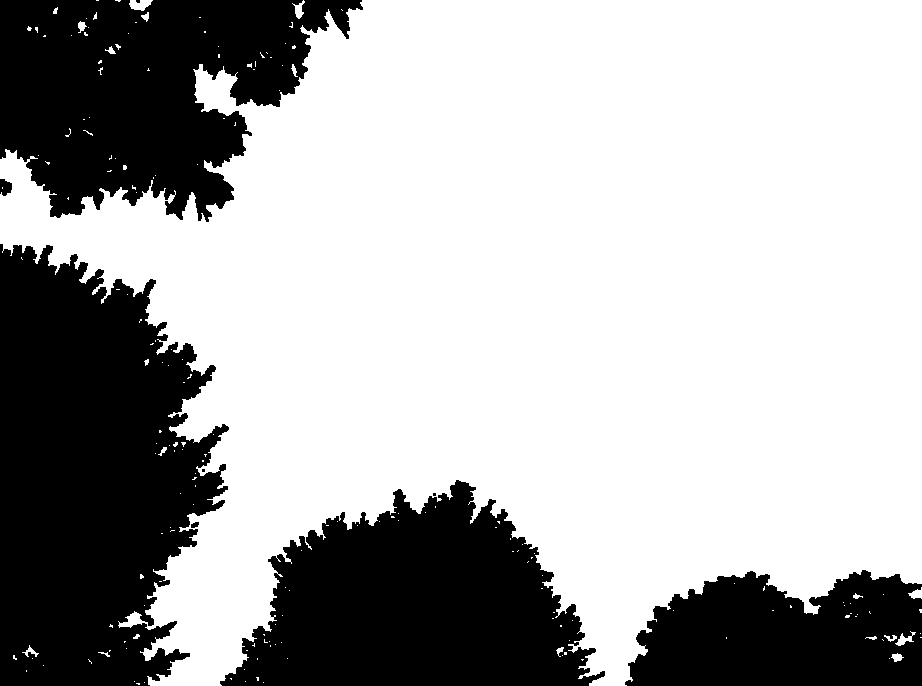

In [67]:
# test your erosion function here on a binary image with a 3x3 structuring element (matrix) with all 1s.
#
img = cv.imread('/content/drive/My Drive/CS484-CS555/HW1-Fall2020/images/Q1.png')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
structuring_el = np.ones((3 ,3))
img_gray = otsu_threshold(img_gray)
eroted_image = erosion_func(img_gray , structuring_el)
cv2_imshow(eroted_image)


#### __Question 6 - Combine multiple techniques__ (20 points + 10 bonus points = 30 points)

In this question, you will use your previously implemented functions. You are provided with 2 gray scale images: `3a.png` and `3b.png` for this question. You are expected to apply a sequence of thresholding, reqion growing and/or morphological operations to segment and count distinct objects in the given image individually.

* The first step is to find (by trial and error or by using Otsu’s method), a threshold that will produce a binary image that best separates objects from the background. Please, specify which method you are using and specify why.
* The second step is to use the morphological operators (dilation, erosion and their combinations) you have implemented, to help separate objects that are connected together or to fill holes in the objects. Note that you might need to use inverse operation on the binary image of the planes as they are painted in white against black background. 
* Once you have a decent binary image, use region growing or (connected components labeling) to produce a labeled image that has a distinct label (an integer ID) for each region.
* You MUST use your own dilation, erosion and thresholding implementations. You CAN use other sources (such as OpenCV) for arithmetic and logical operators, connected components labeling, region growing, and image I/O. Note that you are NOT allowed to use any operator other than the ones listed above.
* Note that you will have to provide analytical justification for the specific sequence of operations performed and what each step achieves. Simply providing a working sequence is not enough. It is also possible that several different sequences achieve desired result, you are encouraged to find and compare them on your own. But report only one such sequence.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


*********************************************
Number of cars are: 16
Number of planes are: 34
Labeled images are: 
For cars: 


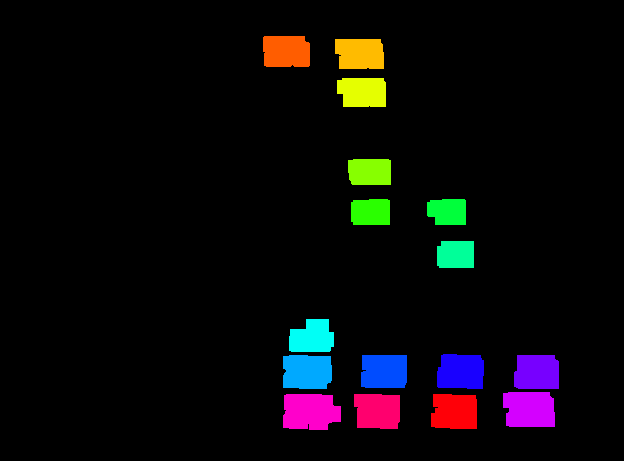

For airplanes: 


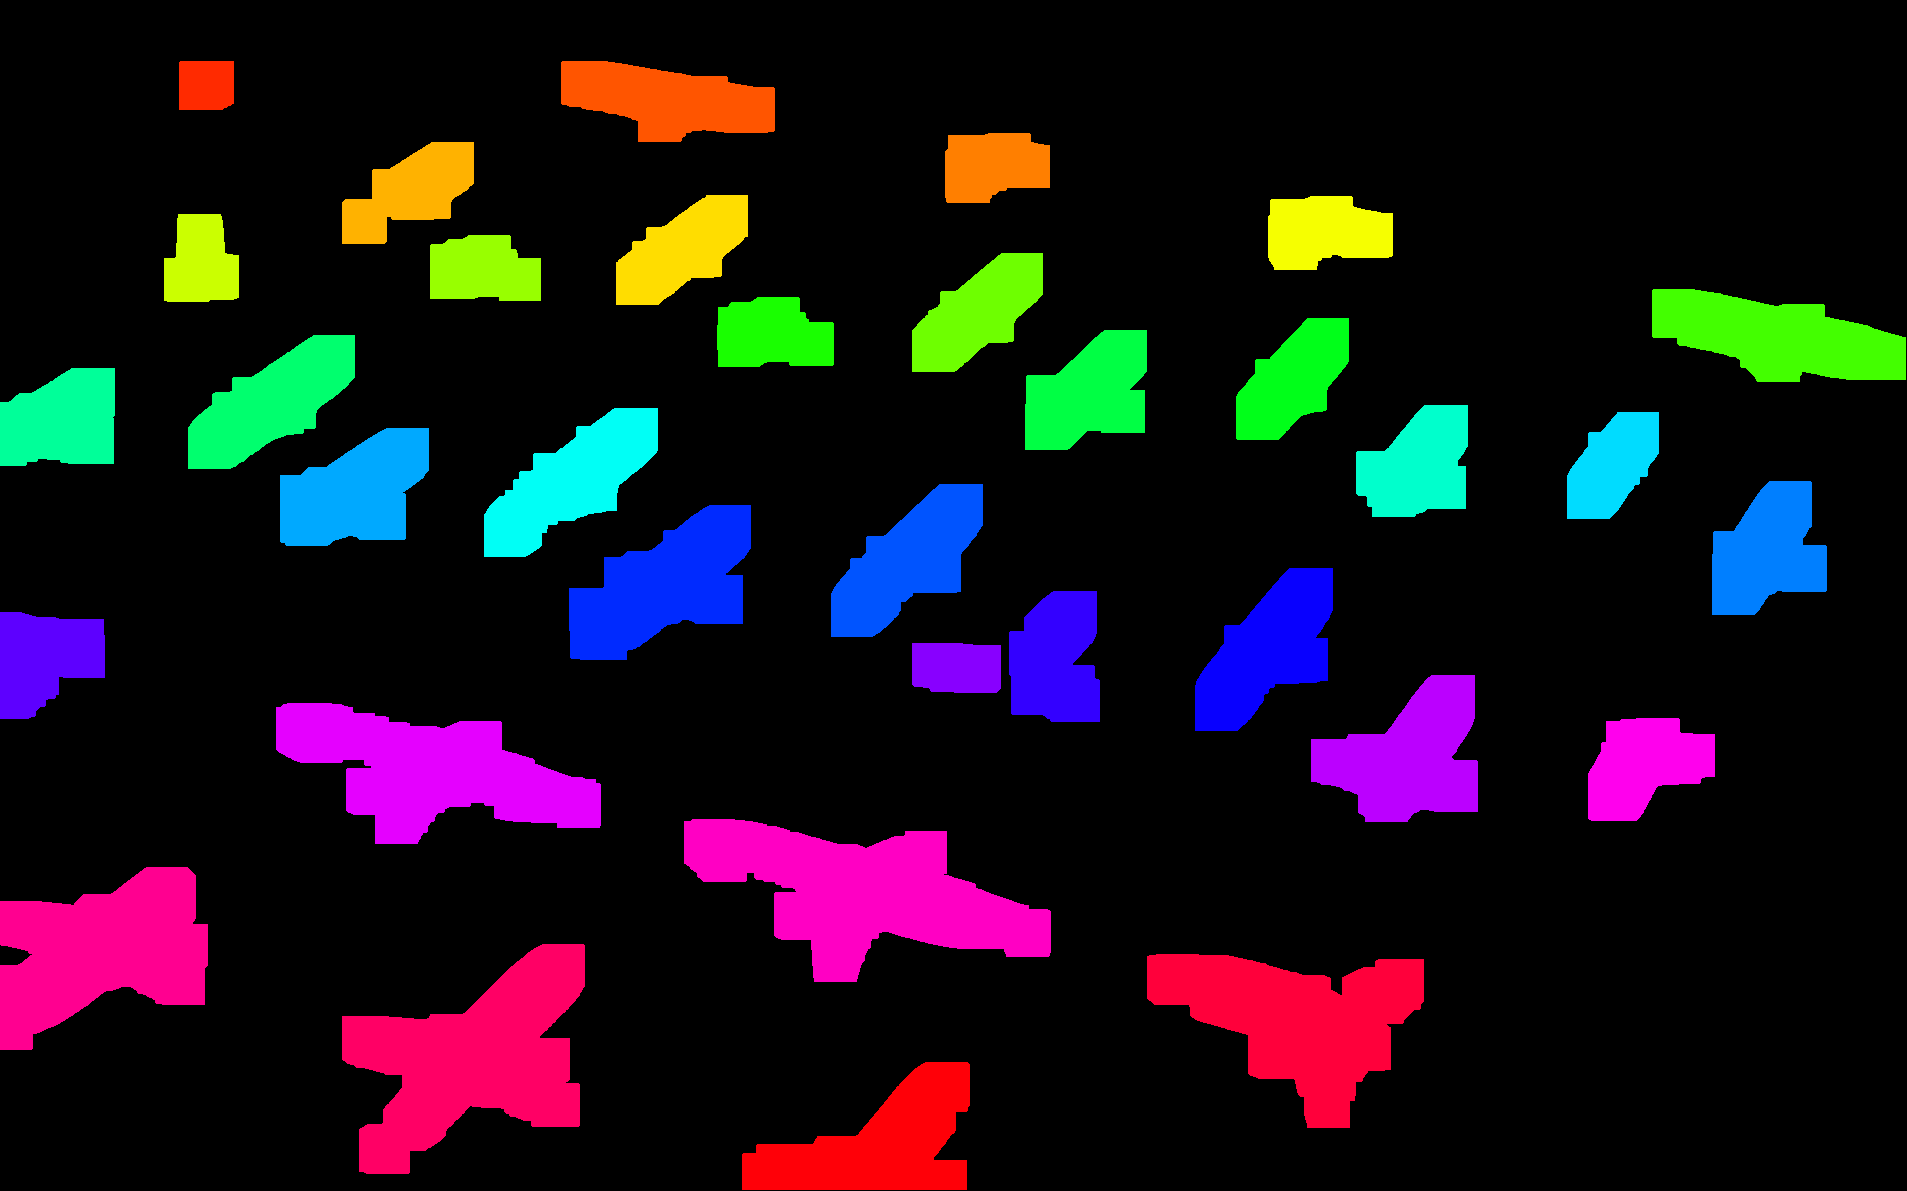

In [69]:
#### part for the cars

img = cv.imread('/content/drive/My Drive/CS484-CS555/HW1-Fall2020/images/3a.png')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
#structuring element
structuring_el = np.ones((13, 13), dtype=int)
#otsu threshold
img_gray = otsu_threshold(img_gray)

degree = math.ceil(13 / 2)
#first dilation to complete car shapes.
dilated_image = dilation(img_gray , structuring_el)
#second erosion to separate car shapes from each other.
eroted_image = erosion_func(dilated_image , structuring_el)
#convert to unit8 
image1copy = np.uint8(eroted_image[degree: -degree, degree: -degree])


label_count_car, labels = cv.connectedComponents(~image1copy)

# Map component labels to hue val
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img_car = cv.merge([label_hue, blank_ch, blank_ch])
# cvt to BGR for display
labeled_img_car = cv.cvtColor(labeled_img_car, cv.COLOR_HSV2BGR)
# set bg label to black
labeled_img_car[label_hue==0] = 0

#### part for the airplanes

img = cv.imread('/content/drive/My Drive/CS484-CS555/HW1-Fall2020/images/3b.png')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
structuring_el = np.ones((17, 21), dtype=int)
structuring_el2 = np.ones((43, 43))
img_gray = otsu_threshold(img_gray)

dilated_image = erosion_func(img_gray , structuring_el)
eroted_image = dilation(dilated_image , structuring_el2)
image1copy = np.uint8(eroted_image)
#get labels and its count
label_count_airplane, labels = cv.connectedComponents(image1copy)

# Map component labels to hue val
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img_airplanes = cv.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for displa
labeled_img_airplanes = cv.cvtColor(labeled_img_airplanes, cv.COLOR_HSV2BGR)

# set bg label to black
labeled_img_airplanes[label_hue==0] = 0


print("*********************************************")
print("Number of cars are: " + str(label_count_car - 1))
print("Number of planes are: " + str(label_count_airplane - 1))
print("Labeled images are: ")
print("For cars: ")
cv2_imshow(labeled_img_car)
print("For airplanes: ")
cv2_imshow(labeled_img_airplanes)

Double click and discuss your techniques and results HERE for Question 6.

> Explanation for image 3a:
In the start I have converted my image to grayscale and called otsu thresholding for the grayscale image. By doing this I separate background and foreground of the image. Then I have called dilation with (13,13) structuring element because I need to fill empty place in the cars. This occured due to their windows. After that I have called erosion to separate each car from the other cars. This created separate cars and delete the noise from the image.
Finally, I have called component analysis on this separated car image.That give me a number of distinct objects in the image. Rest of the operations colored the labels and also made black the other labels. -1 from the label count used to delete background itself from the label count.

> Explanation for image 3b:
In the start I have converted my image to grayscale and called otsu thresholding for the grayscale image. By doing this I separate background and foreground of the image. Then I have called erosion with structuring element because I need separate airplaces which are very close to each other and has small parts. With the help of erosion I delete their small parts and noise and I separate airplanes. After that I have called dilation to increase the size of the separated airplanes. I have used bigger structuring element because image 3b is much bigger that car image. Finally, I have called component analysis on this separated aiplane image.That give me a number of distinct objects in the image. Rest of the operations colored the labels and also made black the other labels.-1 from the label count used to delete background itself from the label count.




#### Grading

 $\;\;\;\;\;\;\;\;\;\;\;$ a $\;\;\;\;\;\;\;\;\;$ b $\;\;\;\;\;\;\;\;\;$ c $\;\;\;\;\;\;\;\;\;$ d  

Q1

Q2   

Q3

Q4  

Q5  

Q6

***
__Total__: /100